<div style="text-align: left;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 11 Viernes 29 de Mayo</span></strong></h1>

# Filtros en dominio de la frecuencia
* **Dominio espacial:** Sea $A\in\mathbb{R}^{m\times n}$ a escala de grises, el valor de cada pixel $A_{i,j}$.$ i \in \left \{ 1,...,m \right \}$, $ j \in \left \{ 1,...,n \right \}$, tiene un  valor de intensidad en la escala de grises y ademas que se encuentra en un dominio de valores llamado espacial.

* Las tecnicas vistas hasta el momento en el curso trabajan en el dominio espacial. En esta parte del curso, trabajaremos con diferentes metodos que se utilizan en otro tipo de dominios.

# Pasos para trabajar en otro dominio

* Sea $f(x,y) = A_{x,y}$, donde $A\in\mathbb{R}^{m\times n}$ 

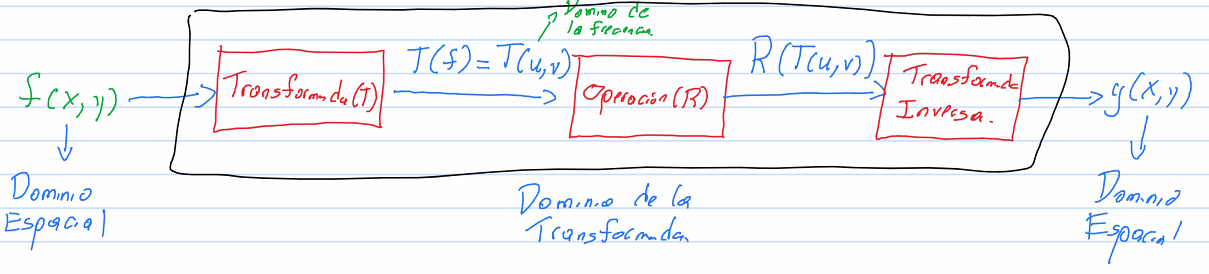

## Transformada discreta de Fourier de 2D (DFT-2D)

* Sea $A\in\mathbb{R}^{m\times n}$, entonces la  DFT-2D de la matriz $A$, es la matriz $F\in\mathbb{R}^{m\times n}$, tal que 

$$F_{u,v} = \sum_{x=0}^{m-1} \cdot \sum_{y=0}^{n-1} A_{x+1,y+1} \cdot exp\left (-j\cdot2\pi \cdot \left ( \frac{ux}{m}+ \frac{vy}{n}\right )\right )$$

donde $j =\sqrt{-1}$, donde $u=1,...,m; v=1,...,n$

t1 =  0.11001
t2 =  0.043516


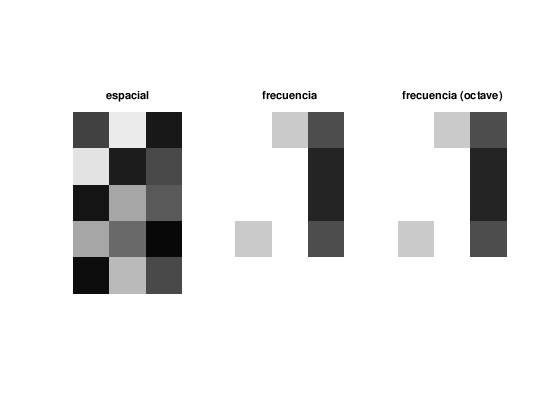

In [13]:
clc; clear;

close all %cerrar todas las figuras abiertas

m=5; n=3;
A = rand(m,n);

subplot(1,3,1)
imshow(A)
title("espacial")

%Implementacion de la DFT-2D, usando la formula original
tic
F = zeros(m,n);
for u = 1:m
    for v = 1:n
        for x = 0: m-1
            for y = 0: n-1
                F(u,v) = F(u,v) + A(x+1,y+1)* exp(-1i*2*pi*(u*x/m + v*y/n));
            end
        end
    end
end
t1= toc

subplot(1,3,2)
imshow(abs(F))
title("frecuencia")

tic
Aux = fft2(A);
F1 = [];
for j = 1:m
    F1(j,:) = flip(Aux(m-j+1,:)'); %Hacer un fklip y calcular el conjugado
end
t2 = toc

subplot(1,3,3)
imshow(abs(F1))
title("frecuencia (octave)")


## Transformada inversa de la DFT-2D

* Sea $A\in\mathbb{R}^{m\times n}$ y $F\in\mathbb{R}^{m\times n}$, donde $F$ es la DFT-2D, entonces la transformada inversa se define como:

$$A_{x,y} = \frac{1}{m\cdot n} \sum_{u=0}^{m-1} * \sum_{v=0}^{n-1} F_{u+1,v+1} \cdot exp\left (j\cdot2\pi \cdot \left ( \frac{ux}{m}+ \frac{vy}{n}\right )\right )$$

In [ ]:
%Tarea: Implementar F inversa%

## Propiedades de DFT-2D


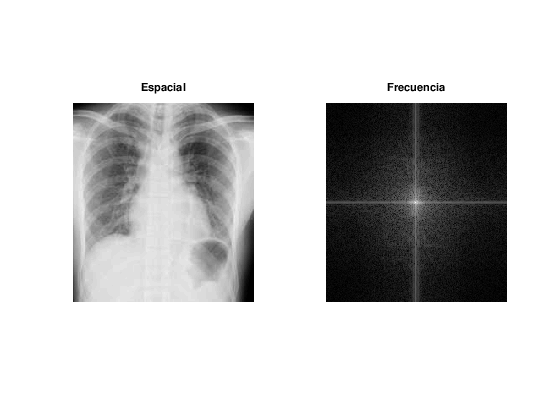

In [23]:
clc; clear;
close all;
X = imread("files/chest.jpg");

X= im2double(X);

subplot(1,2,1)
imshow(X)
title("Espacial")


%Calcular la DFT-2D de la imagen
[m,n] = size(X);
Aux = fft2(X);
F = [];
for j = 1:m
    F(j,:) = flip(Aux(m-j+1,:)'); %Hacer un fklip y calcular el conjugado
end

F = fftshift(F);
subplot(1,2,2)
imshow(log(1+abs(F)), [])
title("Frecuencia")